In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
df = pd.read_csv('hospital.csv',parse_dates=['Room Setup Start Time', 'Patient in Room Time',
       'Anesthesia Start Time', 'Induction End', 'Procedure Start',
       'Procedure End', 'Patient out of Room'])

In [4]:
sum((df['Room Setup Start Time']<=df['Patient in Room Time'])  & (df['Patient in Room Time']<=df['Anesthesia Start Time']) \
& (df['Anesthesia Start Time'] <= df['Induction End']) & (df['Induction End'] <=df['Procedure Start']) \
& (df['Procedure Start'] <= df['Procedure End']) & (df['Procedure End'] <= df['Patient out of Room']))

15043

## If we assume the timeline follows the the order of columns 15043 rows will follow this rule while the whole dataset contains 15495 rows

In [5]:
df.shape

(15495, 13)

## Here we check the number of unique value for each columns, as shown in the table below, there are 53 surgeons etc.

In [6]:
df.T.apply(lambda x: x.nunique(), axis=1)

Room Setup Start Time    624
Patient in Room Time     737
Anesthesia Start Time    740
Induction End            755
Procedure Start          759
Procedure End            785
Patient out of Room      786
Surgeon ID                53
Anesthesiologist ID       51
Scrub ID                 114
Circulator ID             98
First Assistant ID       226
Second Assistant ID      116
dtype: int64

## Here we check the number of missing values in the table. We decided to replace missing value with 999999

In [7]:
df.isna().sum()
df = df.fillna(999999)

## In the following part, we will use the records that follows the timeline rule

In [8]:
df_clean = df[(df['Room Setup Start Time']<=df['Patient in Room Time'])  & (df['Patient in Room Time']<=df['Anesthesia Start Time']) \
& (df['Anesthesia Start Time'] <= df['Induction End']) & (df['Induction End'] <=df['Procedure Start']) \
& (df['Procedure Start'] <= df['Procedure End']) & (df['Procedure End'] <= df['Patient out of Room'])]

In [9]:
df_clean.T.apply(lambda x: x.nunique(), axis=1)

Room Setup Start Time    616
Patient in Room Time     730
Anesthesia Start Time    733
Induction End            743
Procedure Start          756
Procedure End            781
Patient out of Room      783
Surgeon ID                52
Anesthesiologist ID       51
Scrub ID                 115
Circulator ID             98
First Assistant ID       227
Second Assistant ID      114
dtype: int64

## To evaluate the behavior of employees, we choose to calculate the time duration for different stage of operation

In [10]:
def time_diff(df,col2,col1): 
    name = col1+'_'+col2+'_'+'Time_diff'
    df[name] = df[col1] - df[col2]
    for i, row in df.iterrows():
        if row[name].days == -1:        
            df.loc[i,name] = row[name] + timedelta(hours=24)
    df[name] = df[name].dt.seconds/60
    sns.distplot(df[name].values, rug=False)

## For now we choose four time periods:
#### Time between Room Setup Start Time and Patient out of Room which we named Room Occupied Time 
#### Time betwwen Patient in Room Time Patient out of Room which we named Time for Patient
#### Time betwwen Anesthesia Start Time and Induction End which we named Anesthesia time
#### Time betwwen Procedure Start and Procedure End which we named Procedure time


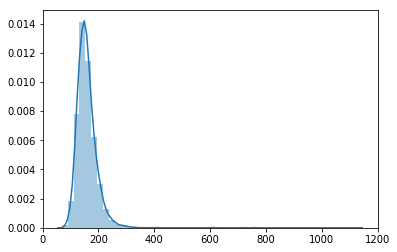

In [11]:
time_diff(df_clean,'Room Setup Start Time','Patient out of Room')

In [12]:
df_clean.sort_values(by=['Patient out of Room_Room Setup Start Time_Time_diff'],ascending=False)[0:3]

,Room Setup Start Time,Patient in Room Time,Anesthesia Start Time,Induction End,Procedure Start,Procedure End,Patient out of Room,Surgeon ID,Anesthesiologist ID,Scrub ID,Circulator ID,First Assistant ID,Second Assistant ID,Patient out of Room_Room Setup Start Time_Time_diff
2273,2018-08-13 00:00:00,2018-08-13 16:27:00,2018-08-13 16:27:00,2018-08-13 16:59:00,2018-08-13 17:19:00,2018-08-13 18:49:00,2018-08-13 18:52:00,684,439,330.0,125,729.0,361.0,1132.0
14710,2018-08-13 00:01:00,2018-08-13 14:30:00,2018-08-13 14:30:00,2018-08-13 14:55:00,2018-08-13 15:14:00,2018-08-13 16:11:00,2018-08-13 16:16:00,93,75,297.0,404,353.0,398.0,975.0
2266,2018-08-13 00:13:00,2018-08-13 13:18:00,2018-08-13 13:18:00,2018-08-13 13:40:00,2018-08-13 14:08:00,2018-08-13 15:32:00,2018-08-13 15:37:00,366,833,37.0,282,569.0,259.0,924.0


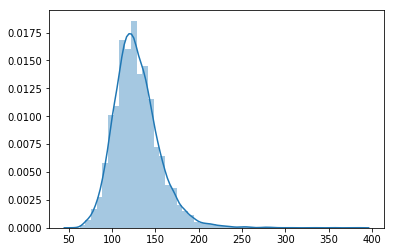

In [13]:
time_diff(df_clean,'Patient in Room Time','Patient out of Room')

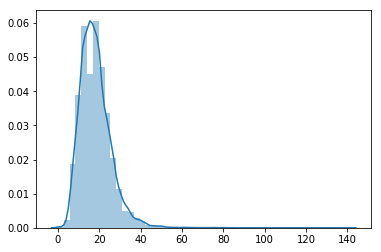

In [14]:
time_diff(df_clean,'Anesthesia Start Time','Induction End')

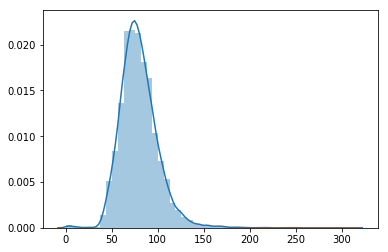

In [15]:
time_diff(df_clean,'Procedure Start','Procedure End')

In [16]:
df_clean = df_clean.rename(index=str, columns={"Patient out of Room_Room Setup Start Time_Time_diff": "Room Occupied Time", \
                                               "Patient out of Room_Patient in Room Time_Time_diff": "Time for Patient",\
                                               "Induction End_Anesthesia Start Time_Time_diff":"Anesthesia time",\
                                               "Procedure End_Procedure Start_Time_diff":'Procedure Time'})

In [17]:
df_clean.columns

Index(['Room Setup Start Time', 'Patient in Room Time',
       'Anesthesia Start Time', 'Induction End', 'Procedure Start',
       'Procedure End', 'Patient out of Room', 'Surgeon ID',
       'Anesthesiologist ID', 'Scrub ID', 'Circulator ID',
       'First Assistant ID', 'Second Assistant ID', 'Room Occupied Time',
       'Time for Patient', 'Anesthesia time', 'Procedure Time'],
      dtype='object')

## Here we check the relationship between different time periods

Text(0,0.5,'Procedure Time')

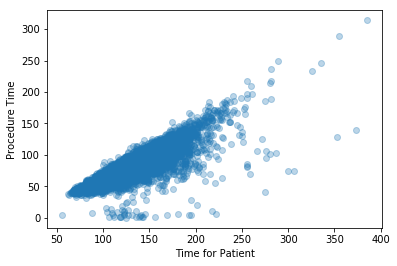

In [18]:
plt.scatter(df_clean['Time for Patient'],df_clean['Procedure Time'],alpha=0.3)
plt.xlabel('Time for Patient')
plt.ylabel('Procedure Time')

Text(0,0.5,'Procedure Time')

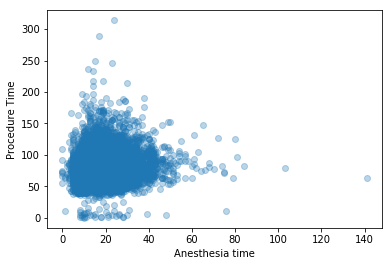

In [19]:
plt.scatter(df_clean['Anesthesia time'],df_clean['Procedure Time'],alpha=0.3)
plt.xlabel('Anesthesia time')
plt.ylabel('Procedure Time')

## After we caculated four duration for each procedure, we can get the average time for each employee on different stage. By comparing the average time we can see if he/she is performing better than usual or worse.

In [20]:
gp = df_clean.groupby('Surgeon ID')['Procedure Time'].mean().reset_index().\
                rename(index=str, columns={'Procedure Time': 'Sur_Pro_Mean'})
df_clean = df_clean.merge(gp,on='Surgeon ID',how='left')

In [21]:
gp = df_clean.groupby('Anesthesiologist ID')['Anesthesia time'].mean().reset_index().\
                rename(index=str, columns={'Anesthesia time': 'Ane_Ane_Mean'})
df_clean = df_clean.merge(gp,on='Anesthesiologist ID',how='left')    

In [22]:
gp = df_clean.groupby('First Assistant ID')['Room Occupied Time'].mean().reset_index().\
                rename(index=str, columns={'Room Occupied Time': 'Fir_As_Ro_Mean'})
df_clean = df_clean.merge(gp,on='First Assistant ID',how='left')    

## Then we count the number of times employees work together

In [23]:
gp = df_clean.groupby(['Surgeon ID','Anesthesiologist ID']).size().reset_index().\
                rename(index=str, columns={0: 'Surgeon_Anesthesiologist_count'})
df_clean = df_clean.merge(gp,on=['Surgeon ID','Anesthesiologist ID'],how='left')    

In [24]:
gp = df_clean.groupby(['Surgeon ID','First Assistant ID']).size().reset_index().\
                rename(index=str, columns={0: 'Surgeon_First_Assistant_ID_count'})
df_clean = df_clean.merge(gp,on=['Surgeon ID','First Assistant ID'],how='left')    

In [25]:
gp = df_clean.groupby(['First Assistant ID','Second Assistant ID']).size().reset_index().\
                rename(index=str, columns={0: 'First_Assistant_ID_Second_Assistant_ID_count'})
df_clean = df_clean.merge(gp,on=['First Assistant ID','Second Assistant ID'],how='left')    

In [26]:
df_clean['Procedure_diff'] = df_clean['Procedure Time'] - df_clean['Sur_Pro_Mean']
df_clean['Anesthesia_diff'] = df_clean['Anesthesia time'] - df_clean['Ane_Ane_Mean']
df_clean['Room_occupied_diff'] = df_clean['Room Occupied Time'] - df_clean['Fir_As_Ro_Mean']

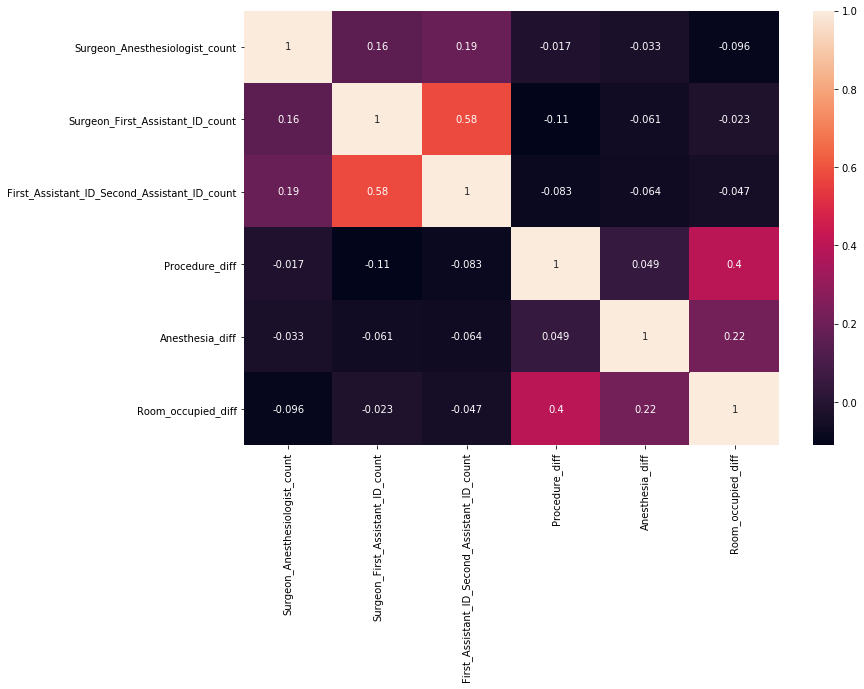

In [27]:
df_sub = df_clean[['Surgeon_Anesthesiologist_count',
       'Surgeon_First_Assistant_ID_count',
       'First_Assistant_ID_Second_Assistant_ID_count', 'Procedure_diff',
       'Anesthesia_diff', 'Room_occupied_diff']]

plt.figure(figsize=(12, 8))
df_corr = df_sub.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

In [28]:
df_clean

,Room Setup Start Time,Patient in Room Time,Anesthesia Start Time,Induction End,Procedure Start,Procedure End,Patient out of Room,Surgeon ID,Anesthesiologist ID,Scrub ID,...,Procedure Time,Sur_Pro_Mean,Ane_Ane_Mean,Fir_As_Ro_Mean,Surgeon_Anesthesiologist_count,Surgeon_First_Assistant_ID_count,First_Assistant_ID_Second_Assistant_ID_count,Procedure_diff,Anesthesia_diff,Room_occupied_diff
0,2018-08-13 07:30:00,2018-08-13 08:15:00,2018-08-13 08:17:00,2018-08-13 08:36:00,2018-08-13 08:51:00,2018-08-13 09:40:00,2018-08-13 09:45:00,684,908,993.0,...,49.0,73.785992,20.026012,145.705263,5,26,2,-24.785992,-1.026012,-10.705263
1,2018-08-13 07:30:00,2018-08-13 08:05:00,2018-08-13 08:05:00,2018-08-13 08:22:00,2018-08-13 08:37:00,2018-08-13 10:03:00,2018-08-13 10:05:00,190,362,855.0,...,86.0,81.747525,15.688172,169.402062,5,12,12,4.252475,1.311828,-14.402062
2,2018-08-13 08:18:00,2018-08-13 08:41:00,2018-08-13 08:41:00,2018-08-13 09:11:00,2018-08-13 09:25:00,2018-08-13 10:42:00,2018-08-13 10:45:00,93,394,398.0,...,77.0,63.888550,15.689008,158.967213,15,8,6,13.111450,14.310992,-11.967213
3,2018-08-13 08:30:00,2018-08-13 09:01:00,2018-08-13 09:01:00,2018-08-13 09:17:00,2018-08-13 09:35:00,2018-08-13 10:35:00,2018-08-13 10:39:00,975,918,131.0,...,60.0,66.276549,20.026749,155.556522,93,11,9,-6.276549,-4.026749,-26.556522
4,2018-08-13 07:30:00,2018-08-13 08:16:00,2018-08-13 08:16:00,2018-08-13 08:30:00,2018-08-13 08:54:00,2018-08-13 10:09:00,2018-08-13 10:14:00,293,985,916.0,...,75.0,89.145270,16.752778,149.133641,7,19,3,-14.145270,-2.752778,14.866359
5,2018-08-13 07:30:00,2018-08-13 08:15:00,2018-08-13 08:15:00,2018-08-13 08:42:00,2018-08-13 08:50:00,2018-08-13 09:52:00,2018-08-13 09:59:00,876,508,418.0,...,62.0,78.912069,22.568421,149.400000,16,17,16,-16.912069,4.431579,-0.400000
6,2018-08-13 07:30:00,2018-08-13 08:16:00,2018-08-13 08:16:00,2018-08-13 08:28:00,2018-08-13 08:49:00,2018-08-13 09:53:00,2018-08-13 09:58:00,366,559,749.0,...,64.0,87.349927,15.976449,161.189474,8,18,15,-23.349927,-3.976449,-13.189474
7,2018-08-13 07:30:00,2018-08-13 08:08:00,2018-08-13 08:08:00,2018-08-13 08:20:00,2018-08-13 08:36:00,2018-08-13 09:43:00,2018-08-13 09:47:00,17,264,40.0,...,67.0,65.519305,17.310811,145.669725,9,15,7,1.480695,-5.310811,-8.669725
8,2018-08-13 07:30:00,2018-08-13 08:58:00,2018-08-13 08:58:00,2018-08-13 09:16:00,2018-08-13 09:36:00,2018-08-13 10:35:00,2018-08-13 10:37:00,17,645,115.0,...,59.0,65.519305,19.191011,149.455882,4,36,2,-6.519305,-1.191011,37.544118
9,2018-08-13 08:30:00,2018-08-13 09:02:00,2018-08-13 09:02:00,2018-08-13 09:27:00,2018-08-13 09:59:00,2018-08-13 11:26:00,2018-08-13 11:29:00,293,630,506.0,...,87.0,89.145270,22.827243,152.521368,32,23,9,-2.145270,2.172757,26.478632


In [29]:
group1 = df_clean.groupby(['Surgeon ID'])

In [30]:
group1['Procedure_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
Surgeon ID,,,,,,,,
17,518.0,1.898439e-14,12.416008,-27.519305,-8.519305,-1.519305,5.480695,78.480695
18,2.0,0.000000e+00,4.949747,-3.500000,-1.750000,0.000000,1.750000,3.500000
21,10.0,-5.684342e-15,15.227534,-19.900000,-11.150000,-3.400000,7.600000,31.100000
22,55.0,5.425963e-15,16.028531,-24.709091,-10.709091,-1.709091,3.290909,61.290909
89,812.0,1.939117e-14,19.866653,-72.738916,-13.988916,-0.738916,11.261084,136.261084
93,655.0,6.074869e-16,13.947305,-62.888550,-7.888550,-1.888550,5.111450,122.111450
107,171.0,1.279808e-14,26.539759,-32.994152,-15.494152,-4.994152,8.005848,190.005848
183,28.0,-1.522592e-15,26.095064,-74.285714,-13.285714,-4.285714,12.964286,77.714286
190,606.0,1.561787e-14,12.482078,-56.747525,-8.747525,-0.747525,6.252475,57.252475


In [31]:
def find_the_group(ID):
    chart = df_clean[df_clean['Surgeon ID'] == ID]
    return df_clean.ix[df_clean['Procedure_diff'] == np.min(chart['Procedure_diff'])]

In [40]:
find_the_group(647)

,Room Setup Start Time,Patient in Room Time,Anesthesia Start Time,Induction End,Procedure Start,Procedure End,Patient out of Room,Surgeon ID,Anesthesiologist ID,Scrub ID,...,Procedure Time,Sur_Pro_Mean,Ane_Ane_Mean,Fir_As_Ro_Mean,Surgeon_Anesthesiologist_count,Surgeon_First_Assistant_ID_count,First_Assistant_ID_Second_Assistant_ID_count,Procedure_diff,Anesthesia_diff,Room_occupied_diff
12033,2018-08-13 12:15:00,2018-08-13 12:23:00,2018-08-13 12:23:00,2018-08-13 12:31:00,2018-08-13 12:42:00,2018-08-13 13:19:00,2018-08-13 13:26:00,647,465,998.0,...,37.0,53.790698,11.944808,120.206349,189,249,30,-16.790698,-3.944808,-49.206349
13283,2018-08-13 07:30:00,2018-08-13 07:55:00,2018-08-13 07:55:00,2018-08-13 08:05:00,2018-08-13 08:18:00,2018-08-13 08:55:00,2018-08-13 09:06:00,647,465,998.0,...,37.0,53.790698,11.944808,120.206349,189,249,208,-16.790698,-1.944808,-24.206349


In [37]:
import csv
df_clean.to_csv('clean_hospital.csv')

In [39]:
pd.unique(df_clean['Surgeon ID'])

array([684, 190,  93, 975, 293, 876, 366,  17, 647, 698, 782, 795, 745,
       962, 426, 743, 107, 342,  89, 585, 966, 556, 663, 574, 763, 343,
       416, 744, 788, 712, 947, 874, 825, 584, 710, 972, 283, 561,  22,
       453, 505, 183, 777, 237, 994,  21, 778, 240,  18, 239, 200, 642])

In [43]:
df_diff = df_clean[['Room Occupied Time','Time for Patient','Anesthesia time','Procedure Time']]

In [45]:
df_diff.describe()

,Room Occupied Time,Time for Patient,Anesthesia time,Procedure Time
count,15043.00000,15043.000000,15043.000000,15043.000000
mean,158.02659,128.438942,18.138669,79.634448
std,39.94862,26.368209,7.562446,20.494402
min,68.00000,56.000000,0.000000,0.000000
25%,135.00000,111.000000,13.000000,66.000000
50%,153.00000,125.000000,17.000000,77.000000
75%,174.00000,143.000000,22.000000,91.000000
max,1132.00000,385.000000,141.000000,314.000000
